In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 

# Loading the CSV data from the file(using appropriate pandas functions) 
import pandas as pd

#Making a variable to store the value of 'Automobile.csv' 
Ahmed_filename = 'Automobile.csv'

# define the name of each column 
Ahmed = pd.read_csv(Ahmed_filename, sep='#', decimal='.', header=None ,
                    names=['symboling' , 'normalized-losses', 
                           'make','fuel-type','aspiration','num-of-doors',
                           'body-style','drive-wheels','engine-location','wheel-base',
                           'length','width','height','curb-weight','engine-type',
                           'num-of-cylinders','engine-size','fuel-system','bore',
                           'stroke','compression-ratio','horsepower','peak-rpm',
                           'city-mpg','highway-mpg','price'])

# knowing the type of the column
Ahmed.dtypes

# Checking the loaded data is equivalent to the data in the source CSV file
Ahmed.head() # here chicking the first five lines which are equivalent

#Making a copy of the dataset
Ahmed_1 = Ahmed.copy()


#to remove the whitespace in each value. 

Ahmed_1['make'] = Ahmed_1['make'].str.strip()          
Ahmed_1['fuel-type'] = Ahmed_1['fuel-type'].str.strip()
Ahmed_1['aspiration'] = Ahmed_1['aspiration'].str.strip()
Ahmed_1['num-of-doors'] = Ahmed_1['num-of-doors'].str.strip()
Ahmed_1['body-style'] = Ahmed_1['body-style'].str.strip()
Ahmed_1['drive-wheels'] = Ahmed_1['drive-wheels'].str.strip()
Ahmed_1['engine-location'] = Ahmed_1['engine-location'].str.strip()
Ahmed_1['engine-type'] = Ahmed_1['engine-type'].str.strip()   
Ahmed_1['num-of-cylinders'] = Ahmed_1['num-of-cylinders'].str.strip()  
Ahmed_1['fuel-system'] = Ahmed_1['fuel-system'].str.strip()  

#For the data entery error in each column

Ahmed_1['make'].replace("Nissan","nissan", inplace=True)
Ahmed_1['make'].replace("vol00112ov","volvo", inplace=True)
Ahmed_1['make'].replace("Peugot","peugot", inplace=True)

# Fuel-type column
Ahmed_1['fuel-type'].replace("Gas","gas", inplace=True)
Ahmed_1['fuel-type'].replace("Diesel","diesel", inplace=True)


#aspiration column
Ahmed_1['aspiration'].replace("Std","std", inplace=True)
Ahmed_1['aspiration'].replace("turrrrbo","turbo", inplace=True)

#num-of-doors column
Ahmed_1['num-of-doors'].replace("fourR","four", inplace=True)
Ahmed_1['num-of-doors'].replace("Four","four", inplace=True)
# body-style column
Ahmed_1['body-style'].replace("Sedan","sedan", inplace=True)
Ahmed_1['body-style'].replace("Wagon","wagon", inplace=True)
# drive-wheels column 
Ahmed_1['drive-wheels'].replace("Fwd","fwd", inplace=True)

# engine-location column 
Ahmed_1['engine-location'].replace("Front","front", inplace=True)
Ahmed_1['engine-location'].replace("FRONT","front", inplace=True)
Ahmed_1['engine-location'].replace("Rear","rear", inplace=True)
Ahmed_1['engine-location'].replace("REAR","rear", inplace=True)

#engine-type column
Ahmed_1['engine-type'].replace("Ohc","ohc", inplace=True)

# num-of-cylinders column
Ahmed_1['num-of-cylinders'].replace("Four","four", inplace=True)

#fuel-system column
Ahmed_1['fuel-system'].replace("Mpfi","mpfi", inplace=True)

import numpy as np 
#santy Checks 

#Exchange 4 with the most similar value which is 3 because the range from -3 to 3
Ahmed_1['symboling'].replace(4,3, inplace=True)
Ahmed_1 ['symboling'].value_counts()


#Here the price there are some wired values and exchange with Nan to exchange later to the mean in this column 
E = Ahmed_1 ['price'] < 5118
Ahmed_1 ['price'] [E.values==True]
Ahmed_1['price'].replace( 0.0, np.nan, inplace=True)
Ahmed_1['price']

#Outliers
#To check if there are outliers or not with the minimum and maximum values or with boxplot
Ahmed_1.describe()

#Check the values that under 65  and exchange with Nan to exchange later to the mean in this column 

E = Ahmed_1 ['normalized-losses'] <65
Ahmed_1 ['normalized-losses'][E.values==True]
Ahmed_1['normalized-losses'].replace( 25.0 , np.nan, inplace=True)
Ahmed_1['normalized-losses']

#To delete any duplicates and need to save it with another value 
AhmedB = Ahmed_1.drop_duplicates(subset=None,keep='first')


#For the missing values and exchange them with the mean 
#At the begining seeing how many columns that have a miss value by this code
AhmedB.apply(lambda x: sum(x.isnull()),axis=0) 

# The result seven columns which can do the mean except one of them delet the rows which is num-of-doors 
#Because num-of-doors is String value and just has 2 missing values which is a small number so deleting the rows is the best solution 
AhmedB['num-of-doors'].isnull()
AhmedB[AhmedB['num-of-doors'].isnull().values==True]

Ahmed_B = AhmedB.drop(AhmedB.index[[27,63]] )
Ahmed_B.apply(lambda x: sum(x.isnull()),axis=0)

# Filling the missing value of bore column 
Ahmed_B['normalized-losses'].fillna(Ahmed_B['normalized-losses'].mean(), inplace=True)

# Filling the missing value of bore column 
Ahmed_B['bore'].fillna(Ahmed_B['bore'].mean(), inplace=True)

# Filling the missing value of stroke column 
Ahmed_B['stroke'].fillna(Ahmed_B['stroke'].mean(), inplace=True)

# Filling the missing value of horsepower column 
Ahmed_B['horsepower'].fillna(Ahmed_B['horsepower'].mean(), inplace=True)

# Filling the missing value of peak-rpm column 
Ahmed_B['peak-rpm'].fillna(Ahmed_B['peak-rpm'].mean(), inplace=True)

# Filling the missing value of price column 
Ahmed_B['price'].fillna(Ahmed_B['price'].mean(), inplace=True)
# check again if there are missing values or not
Ahmed_B.apply(lambda x: sum(x.isnull()),axis=0)

Ahmed_B

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.515152,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.000000
1,3,121.515152,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.000000
2,1,121.515152,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000000
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.000000
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.000000
5,2,121.515152,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.000000
6,1,158.000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.000000
7,1,121.515152,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.000000
8,1,158.000000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.000000
9,0,121.515152,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,13352.574257


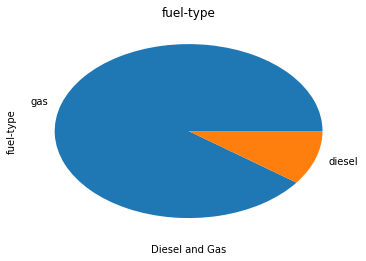

In [9]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values

import matplotlib.pyplot as plt
Ahmed_B['fuel-type'].value_counts().plot(kind='pie')
plt.title('fuel-type')
plt.xlabel('Diesel and Gas')
plt.show()

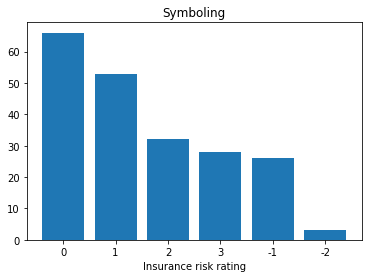

In [3]:
# 1 column with ordinal Values

plt.bar(range(6), Ahmed_B['symboling'].value_counts() , align= 'center')
plt.xticks(range(6),['0','1','2','3','-1','-2'])
plt.title('Symboling')
plt.xlabel('Insurance risk rating')
plt.show()

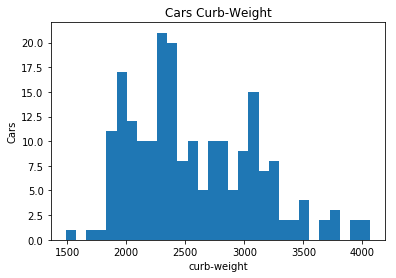

In [4]:
#1 column with numerical values

Ahmed_B['curb-weight'].plot(kind='hist', bins=30)
plt.title('Cars Curb-Weight')
plt.xlabel('curb-weight')
plt.ylabel('Cars')
plt.show()

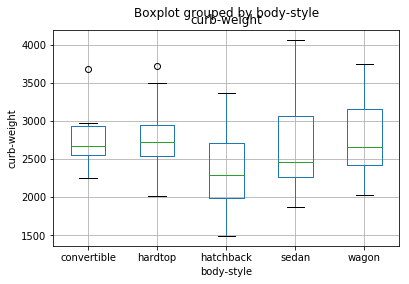

In [5]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns
# 1st visualisation

Ahmed_B.boxplot(column='curb-weight',by='body-style')
plt.ylabel('curb-weight')
plt.show()

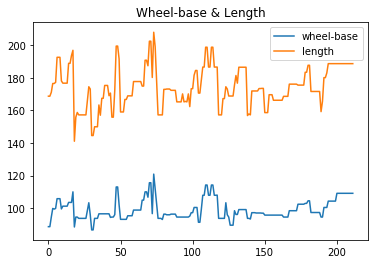

In [6]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns
# 2nd visualisation
Ahmed_B[['wheel-base','length']].plot()
plt.title('Wheel-base & Length')
plt.show()


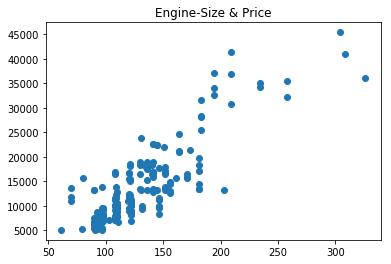

In [7]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns
# 3rd visualisation
plt.scatter(Ahmed_B['engine-size'], Ahmed_B['price'])
plt.title('Engine-Size & Price')
plt.show()

/Users/ahmadbasha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


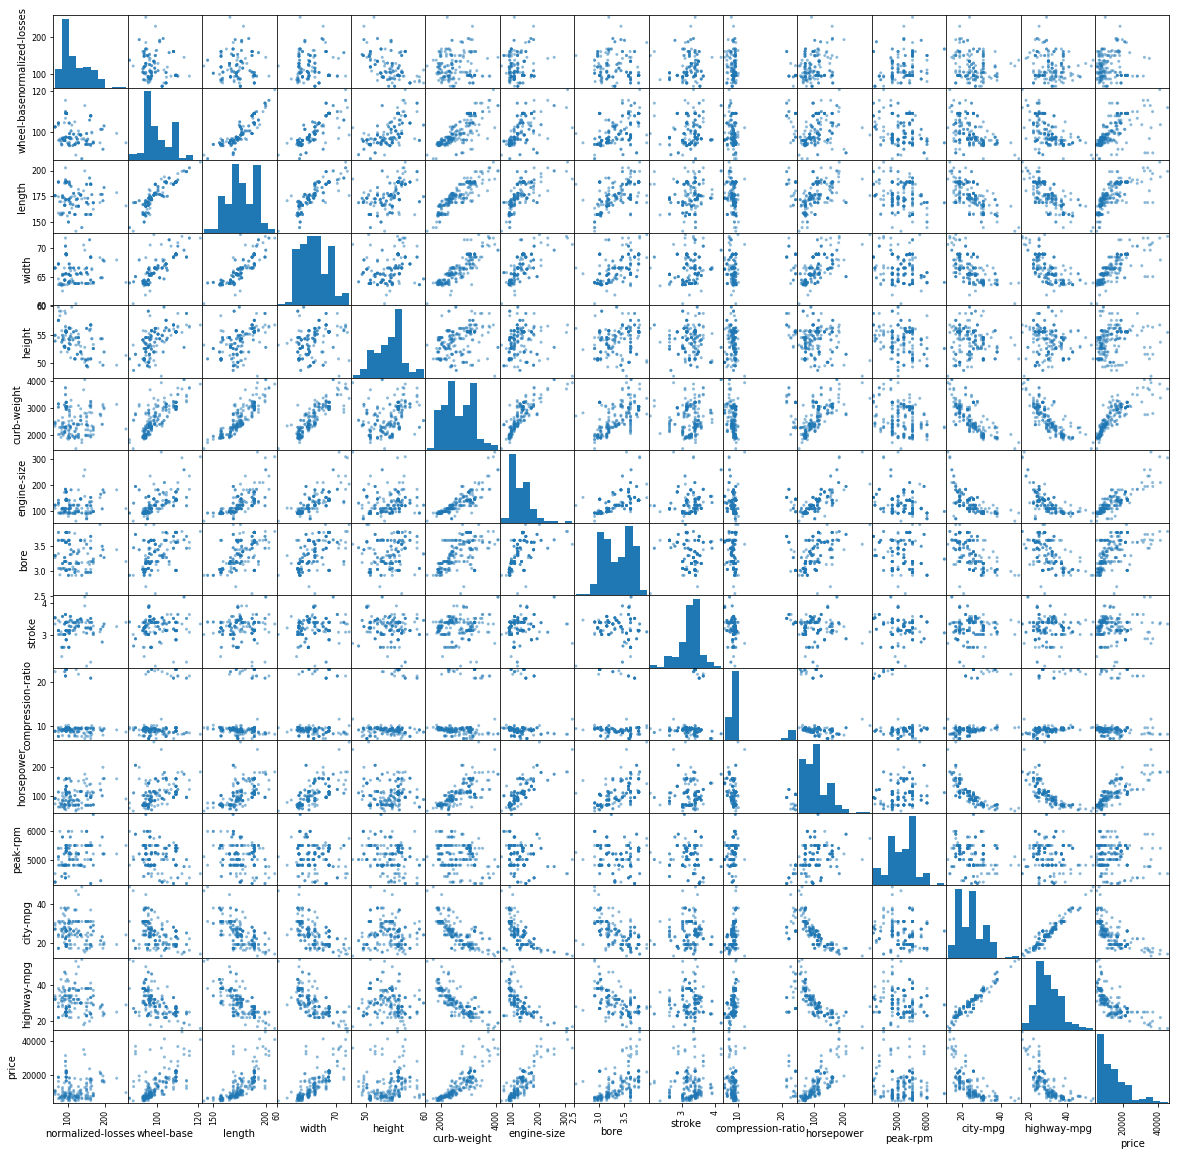

In [8]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns


from pandas.tools.plotting import scatter_matrix
scatter_matrix(Ahmed_1.loc[:,'normalized-losses' : 'price'],figsize=(20,20))
plt.show()